In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1]:
from ucimlrepo import fetch_ucirepo
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

In [48]:
for i in bank_marketing.data.keys():
    print(f"{i} - {type(bank_marketing.data[i])}")

ids - <class 'NoneType'>
features - <class 'pandas.core.frame.DataFrame'>
targets - <class 'pandas.core.frame.DataFrame'>
original - <class 'pandas.core.frame.DataFrame'>
headers - <class 'pandas.core.indexes.base.Index'>


In [51]:
df=bank_marketing.data.original

In [53]:
df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [61]:
df[~(df.poutcome.isna())].head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [37]:
pd.DataFrame.drop_duplicates?

Signature:
pd.DataFrame.drop_duplicates(
    self,
    subset: 'Hashable | Sequence[Hashable] | None' = None,
    *,
    keep: 'DropKeep' = 'first',
    inplace: 'bool' = False,
    ignore_index: 'bool' = False,
) -> 'DataFrame | None'
Docstring:
Return DataFrame with duplicate rows removed.

Considering certain columns is optional. Indexes, including time indexes
are ignored.

Parameters
----------
subset : column label or sequence of labels, optional
    Only consider certain columns for identifying duplicates, by
    default use all of the columns.
keep : {'first', 'last', ``False``}, default 'first'
    Determines which duplicates (if any) to keep.

    - 'first' : Drop duplicates except for the first occurrence.
    - 'last' : Drop duplicates except for the last occurrence.
    - ``False`` : Drop all duplicates.

inplace : bool, default ``False``
    Whether to modify the DataFrame rather than creating a new one.
ignore_index : bool, default ``False``
    If ``True``, the resultin

In [54]:
df.drop_duplicates(inplace=True)

In [62]:
df.drop(columns=['contact','poutcome'],inplace=True)

In [63]:
df.isna().sum()

age               0
job             288
marital           0
education      1857
default           0
balance           0
housing           0
loan              0
day_of_week       0
month             0
duration          0
campaign          0
pdays             0
previous          0
y                 0
dtype: int64

In [9]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [68]:
X['job'].nunique()

11

In [72]:
X['job'].astype('category').cat.codes.value_counts().sort_values(ascending=True)

-1      288
 8      938
 3     1240
 10    1303
 2     1487
 6     1579
 5     2264
 7     4154
 0     5171
 9     7597
 4     9458
 1     9732
Name: count, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   day_of_week  45211 non-null  int64 
 9   month        45211 non-null  object
 10  duration     45211 non-null  int64 
 11  campaign     45211 non-null  int64 
 12  pdays        45211 non-null  int64 
 13  previous     45211 non-null  int64 
 14  y            45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [22]:
X['day_of_week'].nunique()

31

In [24]:
X['poutcome'].unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [76]:
df.sample(15)

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
36176,41,unemployed,single,secondary,no,169,yes,no,11,may,712,1,-1,0,no
44129,35,self-employed,married,tertiary,no,2427,no,no,12,jul,210,3,158,7,yes
37557,32,blue-collar,married,secondary,no,822,yes,no,14,may,19,8,366,6,no
42526,75,retired,divorced,secondary,no,1341,no,no,18,dec,415,7,-1,0,yes
28154,26,technician,single,secondary,no,152,no,yes,29,jan,90,1,-1,0,no
19194,56,retired,married,secondary,no,753,no,yes,6,aug,314,6,-1,0,no
8935,39,blue-collar,married,primary,no,0,yes,no,4,jun,112,4,-1,0,no
23395,31,technician,married,secondary,no,171,no,no,27,aug,81,3,-1,0,no
42272,75,retired,divorced,secondary,no,2199,no,no,13,nov,137,1,-1,0,no
8365,49,admin.,single,secondary,no,-1193,yes,yes,3,jun,73,1,-1,0,no


In [78]:
df.dropna(how='any',inplace=True,)

In [80]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
y              0
dtype: int64

#### optionally to impute the missing values

In [42]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent',missing_values=np.nan)

In [43]:
df_imp=pd.DataFrame(imp.fit_transform(X))

In [44]:
df_imp.columns=X.columns
df_imp.index=X.index

In [45]:
df_imp.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          43193 non-null  int64 
 1   job          43193 non-null  object
 2   marital      43193 non-null  object
 3   education    43193 non-null  object
 4   default      43193 non-null  object
 5   balance      43193 non-null  int64 
 6   housing      43193 non-null  object
 7   loan         43193 non-null  object
 8   day_of_week  43193 non-null  int64 
 9   month        43193 non-null  object
 10  duration     43193 non-null  int64 
 11  campaign     43193 non-null  int64 
 12  pdays        43193 non-null  int64 
 13  previous     43193 non-null  int64 
 14  y            43193 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.3+ MB


In [82]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
30899,41,admin.,single,secondary,no,242,no,yes,9,feb,116,3,-1,0,no
12612,37,technician,single,tertiary,no,487,no,yes,4,jul,30,2,-1,0,no
26637,31,blue-collar,married,secondary,no,1515,yes,no,20,nov,361,1,-1,0,no
28367,33,services,married,secondary,no,0,yes,no,29,jan,578,1,-1,0,no
7780,51,technician,divorced,secondary,no,468,yes,no,30,may,475,4,-1,0,no
15249,43,admin.,married,secondary,no,0,yes,no,17,jul,674,3,-1,0,no
27594,38,housemaid,divorced,tertiary,no,4312,no,no,21,nov,407,4,182,2,no
36599,37,blue-collar,married,primary,no,-106,yes,yes,12,may,690,1,-1,0,yes
9001,46,technician,married,secondary,no,488,no,no,5,jun,92,1,-1,0,no
12783,35,management,single,tertiary,no,12,no,no,7,jul,289,1,-1,0,no


In [83]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day_of_week', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

In [84]:
to_convert=np.array(['job', 'marital', 'education', 'default','housing','month','y','loan'])

In [87]:
for col in df.columns:
    if col in to_convert:
        df[col]=df[col].astype('category').cat.codes

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          43193 non-null  int64
 1   job          43193 non-null  int8 
 2   marital      43193 non-null  int8 
 3   education    43193 non-null  int8 
 4   default      43193 non-null  int8 
 5   balance      43193 non-null  int64
 6   housing      43193 non-null  int8 
 7   loan         43193 non-null  int8 
 8   day_of_week  43193 non-null  int64
 9   month        43193 non-null  int8 
 10  duration     43193 non-null  int64
 11  campaign     43193 non-null  int64
 12  pdays        43193 non-null  int64
 13  previous     43193 non-null  int64
 14  y            43193 non-null  int8 
dtypes: int64(7), int8(8)
memory usage: 3.0 MB


In [91]:
df.sample(14)

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
40431,27,0,1,2,0,565,1,0,2,5,148,1,-1,0,0
7768,32,0,0,2,0,-127,1,0,30,8,288,4,-1,0,0
24378,50,10,2,1,0,2668,0,0,17,9,1606,1,-1,0,0
25197,33,9,1,1,0,2746,1,0,18,9,188,2,-1,0,0
34081,31,0,1,1,0,35,0,0,30,0,615,1,-1,0,1
33447,69,5,1,2,0,473,0,0,20,0,333,1,-1,0,0
15699,40,4,1,2,0,-65,0,1,21,5,65,2,-1,0,0
19637,53,1,1,0,0,1388,0,0,7,1,139,4,-1,0,0
32607,35,9,0,1,0,48,1,0,17,0,73,1,-1,0,0
10412,56,5,1,0,0,133,0,1,12,6,322,2,-1,0,0


In [96]:
df[['balance','age','duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
balance,43193.0,1354.027342,3042.103625,-8019.0,71.0,442.0,1412.0,102127.0
age,43193.0,40.764082,10.512640,18.0,33.0,39.0,48.0,95.0
duration,43193.0,258.323409,258.162006,0.0,103.0,180.0,318.0,4918.0


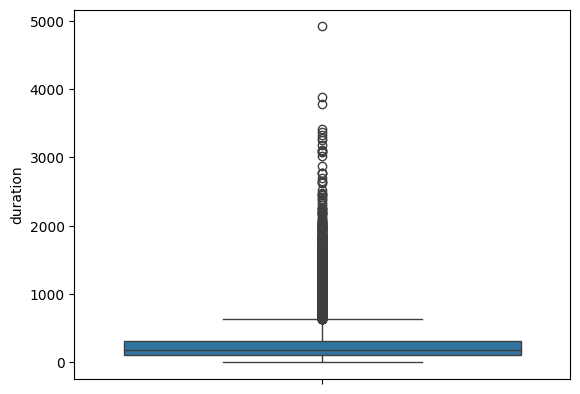

In [102]:
sns.boxplot(df['duration'])
plt.show()

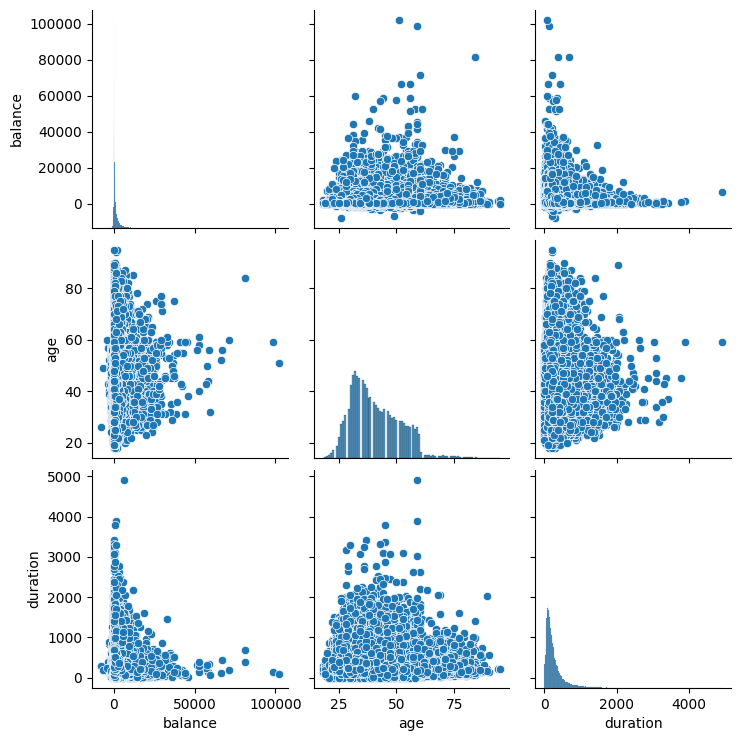

In [103]:
sns.pairplot(df[['balance','age','duration']])
plt.show()

In [107]:
df[['balance','age','duration']].corr()

,balance,age,duration
balance,1.000000,0.097602,0.020051
age,0.097602,1.000000,-0.004953
duration,0.020051,-0.004953,1.000000


In [108]:
X=df.drop('y',axis=1)
y=df['y']

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44)

In [114]:
scaler=StandardScaler()

In [115]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [116]:
X_train[0]

array([-1.22029777, -1.01687408, -0.27019738, -0.22198605, -0.13494721,
       -0.44432533, -1.13351847, -0.44600163,  1.46629851,  0.82388608,
       -0.97361467,  0.39836664, -0.41010896, -0.23978078])

In [119]:
X_train[0].std()

0.7300674763005507

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
log_reg=LogisticRegression()

In [122]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [123]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [159]:
print(accuracy_score(y_train,log_reg.predict(X_train)))

0.8926897030734503


In [125]:
print(accuracy_score(y_test,log_reg.predict(X_test)))

0.88713971524482


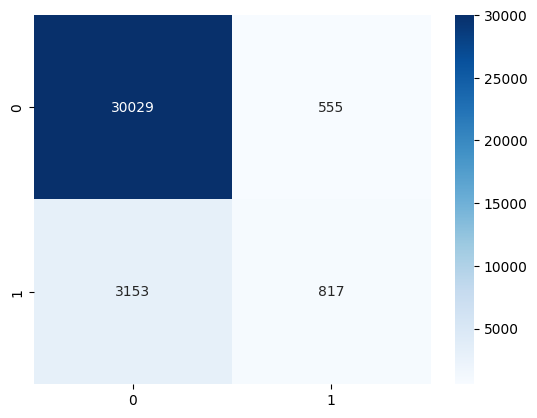

In [152]:
sns.heatmap(confusion_matrix(y_train,log_reg.predict(X_train)),
            annot=True,fmt='d',cmap='Blues')
plt.show()

In [153]:
print(classification_report(y_train,log_reg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     30584
           1       0.60      0.21      0.31      3970

    accuracy                           0.89     34554
   macro avg       0.75      0.59      0.62     34554
weighted avg       0.87      0.89      0.87     34554



In [143]:
count=0
for i in list(y_test):
    count+=1
    if i==1:
        print(count)
        break

6


In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
knn=KNeighborsClassifier(n_neighbors=5,)

In [156]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [160]:
print(accuracy_score(y_train,knn.predict(X_train)))

0.9187069514383284


In [158]:
print(accuracy_score(y_test,knn.predict(X_test)))

0.8829725662692441


In [163]:
results=[]
for i in range(2,16):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    print(f"{i} - {accuracy_score(y_train,model.predict(X_train))}")
    results.append(accuracy_score(y_test,model.predict(X_test)))

2 - 0.9278809978584245
3 - 0.9310354806968802
4 - 0.9156682294379811
5 - 0.9187069514383284
6 - 0.9107773340278984
7 - 0.9117902413613475
8 - 0.9061469005035596
9 - 0.907478150141807
10 - 0.9041210858366615
11 - 0.9044394281414597
12 - 0.9018348092840193
13 - 0.9029345372460497
14 - 0.9001562771314464
15 - 0.9014296463506396


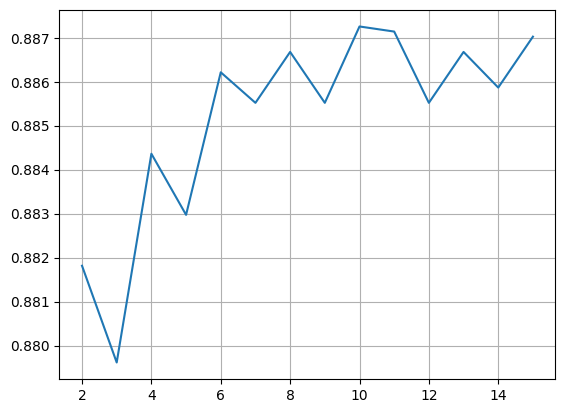

In [165]:
plt.plot(range(2,16),results)
plt.grid()
plt.show()

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [167]:
models={"tree":DecisionTreeClassifier(max_depth=7,),
       "random_forest":RandomForestClassifier(),
       "svc":SVC(C=100,gamma=1)}

In [168]:
performing_results=dict()
for key,value in models.items():
    value.fit(X_train,y_train)
    performing_results[key]=value.predict(X_test)

In [170]:
for key,val in performing_results.items():
    print(f"{key} - {accuracy_score(y_test,val)}")

tree - 0.8903808311147123
random_forest - 0.8974418335455493
svc - 0.8690820696839912


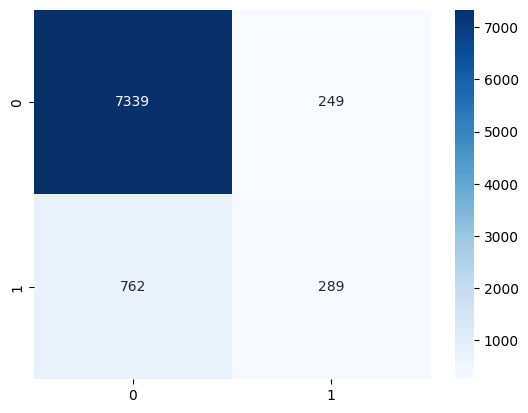

In [172]:
sns.heatmap(confusion_matrix(y_test,knn.predict(X_test)),
            annot=True,fmt='d',cmap='Blues')
plt.show()